# 자동차 연비 데이터로 회귀분석

In [35]:
!pip install seaborn
!pip install -q seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
#Auto MPG데이터셋 가져오기
dataset_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(dataset_path)



/root/.keras/datasets/auto-mpg.data


In [37]:
#판다스 이용해서 데이터 읽기
col_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration','Model Year', 'Origin']
raw_data = pd.read_csv(dataset_path,names=col_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_data.copy()
dataset.tail(10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [38]:
dataset.shape

(398, 8)

In [39]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [40]:
#데이터 정제
dataset = dataset.dropna()
dataset.shape


(392, 8)

In [41]:
origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [42]:
#새로운 열 3개 추가
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [43]:
#훈련데이터와 테스트 데이터 분할
train_dataset = dataset.sample(frac=0.8, random_state=0)
print(train_dataset)
test_dataset = dataset.drop(train_dataset.index)
print(test_dataset)

      MPG  Cylinders  Displacement  Horsepower  ...  Model Year  USA  Europe  Japan
146  28.0          4          90.0        75.0  ...          74  1.0     0.0    0.0
282  22.3          4         140.0        88.0  ...          79  1.0     0.0    0.0
69   12.0          8         350.0       160.0  ...          72  1.0     0.0    0.0
378  38.0          4         105.0        63.0  ...          82  1.0     0.0    0.0
331  33.8          4          97.0        67.0  ...          80  0.0     0.0    1.0
..    ...        ...           ...         ...  ...         ...  ...     ...    ...
281  19.8          6         200.0        85.0  ...          79  1.0     0.0    0.0
229  16.0          8         400.0       180.0  ...          77  1.0     0.0    0.0
150  26.0          4         108.0        93.0  ...          74  0.0     0.0    1.0
145  32.0          4          83.0        61.0  ...          74  0.0     0.0    1.0
182  28.0          4         107.0        86.0  ...          76  0.0     1.0

In [44]:
print(train_dataset.shape, test_dataset.shape)

(314, 10) (78, 10)


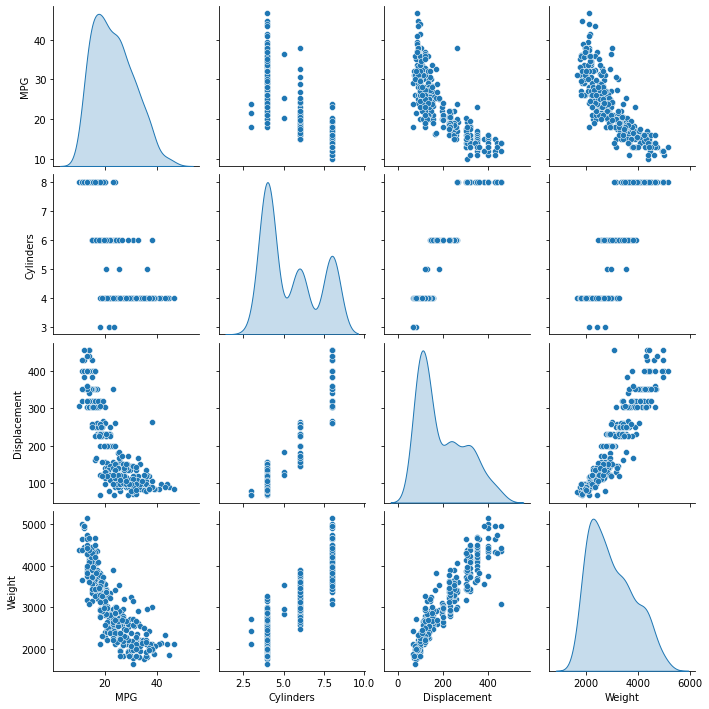

In [45]:
#산점도 시각화
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [46]:
train_stats = train_dataset.describe()
print(train_stats)

              MPG   Cylinders  Displacement  ...         USA      Europe       Japan
count  314.000000  314.000000    314.000000  ...  314.000000  314.000000  314.000000
mean    23.310510    5.477707    195.318471  ...    0.624204    0.178344    0.197452
std      7.728652    1.699788    104.331589  ...    0.485101    0.383413    0.398712
min     10.000000    3.000000     68.000000  ...    0.000000    0.000000    0.000000
25%     17.000000    4.000000    105.500000  ...    0.000000    0.000000    0.000000
50%     22.000000    4.000000    151.000000  ...    1.000000    0.000000    0.000000
75%     28.950000    8.000000    265.750000  ...    1.000000    0.000000    0.000000
max     46.600000    8.000000    455.000000  ...    1.000000    1.000000    1.000000

[8 rows x 10 columns]


In [48]:
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats.head(9)

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [47]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [49]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


In [50]:
#모델구성
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer = optimizer, metrics=['mae','mse'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [51]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print(example_result)

[[-0.06811798]
 [ 0.03750807]
 [ 1.0539898 ]
 [-0.28457496]
 [-0.01414248]
 [ 0.06748711]
 [-0.03198465]
 [ 0.11240526]
 [ 0.20827186]
 [ 0.28498662]]


In [52]:
#모델 훈련
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0:print('')
    print('.',end='')

EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [53]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.149905,0.893387,2.149905,9.081628,2.390896,9.081628,995
996,2.189011,0.918743,2.189011,9.187725,2.424835,9.187725,996
997,2.256505,0.911434,2.256505,8.796190,2.345426,8.796190,997
998,2.148932,0.917087,2.148932,8.709880,2.315730,8.709880,998
999,2.191133,0.938671,2.191133,8.826341,2.373028,8.826341,999


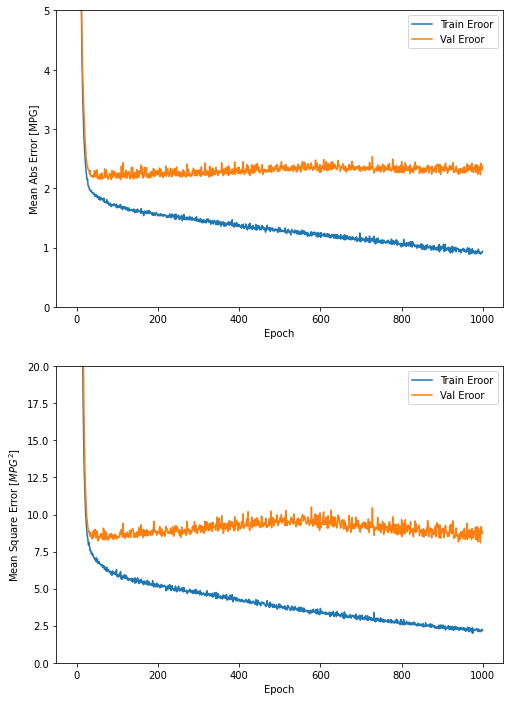

In [56]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Eroor')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Eroor')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Eroor')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Eroor')
  plt.ylim([0,20])
  plt.legend()

plot_history(history)

In [57]:
#성능 평가
loss , mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.8318 - mae: 2.0107 - mse: 6.8318
테스트 세트의 평균 절대 오차:  2.01 MPG


46.065
45.746125822067256


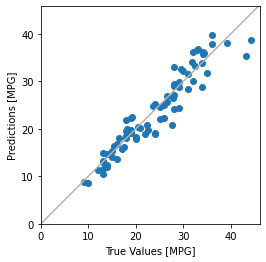

In [58]:
#예측
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
print(plt.xlim()[1])
plt.xlim([0,plt.xlim()[1]])
print(plt.ylim()[1])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100], c='.7')

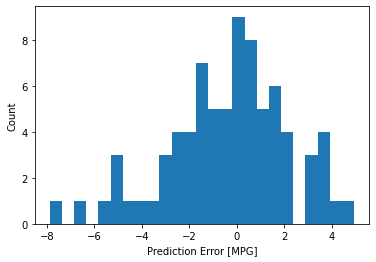

In [59]:
#오차의 분포
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")